# Proof of Concept

In [1]:
from typing import Tuple

In [2]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Just for test data
import numpy as np

In [4]:
groups = ['control', 'test']
conversions = [478, 532]
totals = [5323, 5277]

In [5]:
def display_ab_test_results(sample_size: int=10000, shade: bool=False, figsize: Tuple[int, int]=None):
    # Use H2 for cell title since H1 should be used for the notebook's title
    display(HTML('<h2>A/B Test Results</h2>'))
    
    display(HTML('''
        <table width="380">
            <thead>
                <tr style="text-align: right;">
                    <th>Comparison</th>
                    <th>Confidence</th>
                    <th>Relative Increase</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><b>test</b> converts higher than <b>control</b></td>
                    <td><span class="badge" style="background:green;">97%</span></td>
                    <td><span class="badge" style="background:green;">9,6%</span></td>
                </tr>
            </tbody>
        </table>
    '''))

    display(HTML(f'''
        <table width="380">
            <thead>
                <tr style="text-align: right;">
                    <th>Group</th>
                    <th>Conversion</th>
                    <th>Total</th>
                    <th>Observed Rate</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{groups[0]}</td>
                    <td>{conversions[0]}</td>
                    <td>{totals[0]}</td>
                    <td>{(conversions[0] / totals[0] * 100):.2f}%</td>
                </tr>
                <tr>
                    <td>{groups[1]}</td>
                    <td>{conversions[1]}</td>
                    <td>{totals[1]}</td>
                    <td>{(conversions[1] / totals[1] * 100):.2f}%</td>
                </tr>
            </tbody>
        </table>
    '''))
    

    if figsize is None:
        figsize = (14, 4)
    plt.figure(figsize=figsize)
    
    plt.subplot(121)
    plt.title('Comparison of conversion rates')
    binom_control = [np.random.binomial(1, conversions[0]/totals[0], totals[0]).mean() for _ in range(sample_size)]
    dist_control = np.random.normal(loc=np.mean(binom_control), scale=np.std(binom_control), size=sample_size)
    binom_test = [np.random.binomial(1, conversions[1]/totals[1], totals[1]).mean() for _ in range(sample_size)]
    dist_test = np.random.normal(loc=np.mean(binom_test), scale=np.std(binom_test), size=sample_size)
    sns.kdeplot(dist_control, shade=shade, label='control')
    sns.kdeplot(dist_test, shade=shade, label='test')
    plt.xlabel('conversion rate')
    
    plt.subplot(122)
    plt.title('Pairwise differences in conversion rates')
    sns.kdeplot(dist_test - dist_control, shade=shade, label='test - control')
    plt.xlabel('difference in conversion rate')
    
    plt.show()

Comparison,Confidence,Relative Increase
test converts higher than control,97%,"9,6%"


Group,Conversion,Total,Observed Rate
control,478,5323,8.98%
test,532,5277,10.08%


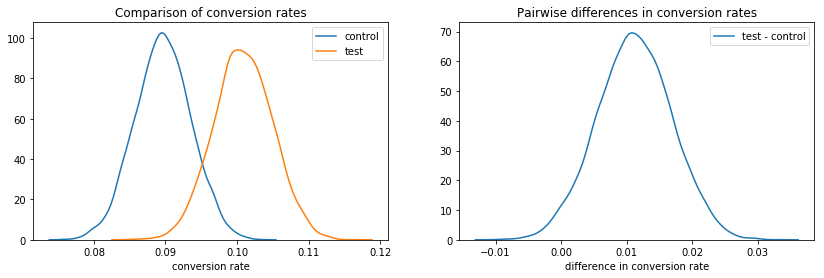

In [6]:
display_ab_test_results()